<a href="https://colab.research.google.com/github/WantKakao/deep_learning/blob/main/SOM_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

Training the SOM

In [4]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=7d40a64a75a0cb954de8bf4361ce7dce863b256f1ed30d742381791dd20875c1
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [5]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

Visualizing the result

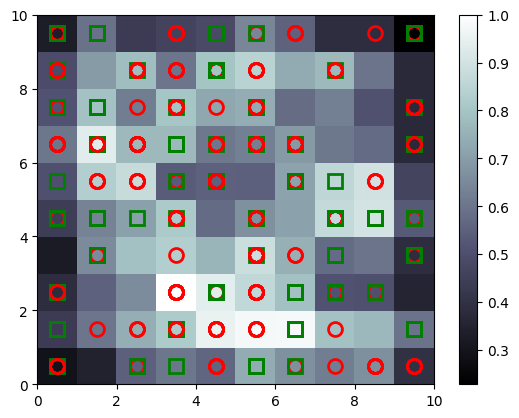

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

Finding the frauds

In [9]:
mappings = som.win_map(X)
frauds = mappings[(3, 2)]
# 두개 이상일 시
# frauds = np.concatenate((mappings[(6, 8)], mappings[(8, 1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [10]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15651868
15593959
15651460
15672637
15592999
15611409
15609987
15609758
15636454
15608916


Creating the matrix of features

In [19]:
customers = dataset.iloc[:, 1:].values

Creating the dependent variable

In [31]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1

### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Initializing the ANN

In [35]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [36]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

### Adding the output layer

In [37]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# 만약 3개 이상의 카테고리일 경우
# ann.add(tf.keras.layers.Dense(units=1, activation='softmax'))

### Compiling the ANN

In [38]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# 만약 3개 이상의 카테고리일 경우
# ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [41]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8538 - loss: 0.4939
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9853 - loss: 0.2866


### Predicting the probabilities of frauds



In [45]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [46]:
print(y_pred)

[[1.56739070e+07 1.20333571e-03]
 [1.57673580e+07 1.32941222e-03]
 [1.55705080e+07 1.48598687e-03]
 ...
 [1.55695950e+07 2.85166800e-01]
 [1.57280100e+07 2.85166800e-01]
 [1.57631940e+07 2.85166800e-01]]
